# Математика - Домашнее задание 6

**Дедлайн:** 23:59, 12 января

## Задание:
Необходимо подготовить отчет с результатами применения обсужденных на лекции методов к произвольным данным, которые вы найдете в свободном доступе.

1. На платформе Kaggle или на Github найдите достаточно большой датасет с логами пользования сервисов (просмотры Youtube или стриминговых сервисов, такси/каршеринг или что угодно, где есть много юзеров и история их взаимодействия с каким-нибудь сервисом). В случае, если такого датасета нет - сгенерируйте самостоятельно (например, как на лекции было показано распределение по просмотру в Кион).

2. Разбейте на сегменты вашу аудиторию и примените для нескольких (примерно 3-4 метрики) метрик тесты Стьюдента, Манна-Уитни, Фишера (Фишера для нескольких сегментов). Проинтерпретируйте результаты, сделайте первые выводы.  
3. Для >=3 сегментов сделайте попарные сравнения через тест Стьюдента и тест Фишера. Проверьте, соотносятся ли результаты.  
4. Постройте точный и эфронов доверительные интервалы для выбранных метрик. Проверьте, соответствуют ли эти доверительные интервалы результатам теста Стьюдента.  
5. Подумайте, можно ли использовать в пункте 2 другие стат. тесты. Приведите пару примеров.

## Для получения зачета необходимо:
- **Зачет на 4:** выполнены пункты 1-4 задания, допускаются небольшие недочеты.
- **Зачет на 5:** выполнены все пункты задания, допускаются небольшие недочеты.

### 1. На платформе Kaggle или на Github найдите достаточно большой датасет с логами пользования сервисов (просмотры Youtube или стриминговых сервисов, такси/каршеринг или что угодно, где есть много юзеров и история их взаимодействия с каким-нибудь сервисом). В случае, если такого датасета нет - сгенерируйте самостоятельно (например, как на лекции было показано распределение по просмотру в Кион).

### **Predict Online Course Engagement Dataset**
**Understanding User Behavior and Course Completion**



[Link](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset)

In [720]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import ttest_ind, mannwhitneyu, norm, shapiro, normaltest, ttest_ind_from_stats, kstest, anderson, normaltest
from itertools import combinations
import scipy.stats as sts
from scipy import stats

# Настройка стиля
sns.set_style("whitegrid")  
palette = sns.color_palette("husl", 8)
%matplotlib inline

#### Формулируем гипотезу $H_0$ об отсутствии значимых различий между сегментами по выбранным метрикам

In [722]:
# Загружаю данные
df = pd.read_csv('online_course_engagement_data.csv')
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


(array([1821.,    0., 1718.,    0.,    0., 1814.,    0., 1810.,    0.,
        1837.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

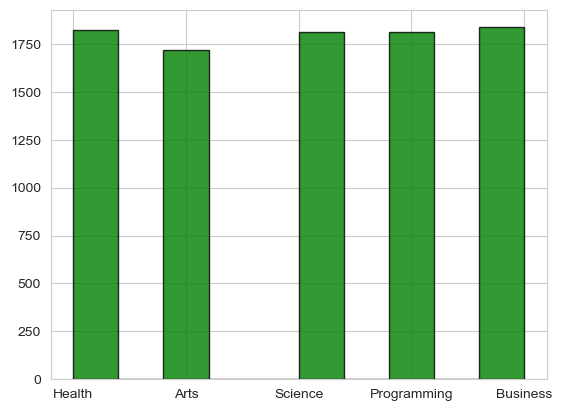

In [723]:
# посмотрим на представленность классов

plt.hist(df['CourseCategory'], color="green", edgecolor="black", alpha=0.8)

In [724]:
# Удалю переменные, на которые не хочу смотреть

df = df.drop(['CourseCompletion', 'DeviceType'], axis=1)

#### Введем новые метрики

In [726]:
# Average Time Spent Per Video
# TimeSpentOnCourse/NumberOfVideosWatched

df['AverageTimeSpentPerVideo'] = np.where(
    df['NumberOfVideosWatched'] > 0,
    df['TimeSpentOnCourse'] / df['NumberOfVideosWatched'],
    0
)
# Average Quiz Score
# QuizScores/NumberOfQuizzesTaken

df['AverageQuizScore'] = np.where(
    df['NumberOfQuizzesTaken'] > 0,
    df['QuizScores'] / df['NumberOfQuizzesTaken'],
    0
)

#### Интересный вопрос

Удаление строк, где значения в AverageTimeSpentPerVideo или AverageQuizScore равны 0 

AverageTimeSpentPerVideo - так как не взаимодействовал с контентом визуально, AverageQuizScore - так как не решал задания

Почему вообще так много людей, которые решали задания, но смотрели курс, или решали задания, но не смотрели курс? 
Насколько вообще адекватно их сравнивать?

Оставлю, как есть, но удалю нули в completion rate, так как все-таки смысла в таких строках точно мало

In [728]:
# Рассчитываем AverageTimeSpentPerVideo и AverageQuizScore

df = df[(df['CompletionRate'] != 0)]

# И удалю дубликаты по id и по курсу - точно один и тот же пользователь
df= df.drop_duplicates(subset=['UserID', 'CourseCategory'], keep=False)

# Удалю переменные, на которые не хочу смотреть

df = df.drop(['NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', ], axis=1)
df

,UserID,CourseCategory,TimeSpentOnCourse,CompletionRate,AverageTimeSpentPerVideo,AverageQuizScore
0,5618,Health,29.979719,20.860773,1.763513,16.788552
1,4326,Arts,27.802640,65.632415,27.802640,12.523194
2,5849,Arts,86.820485,63.812007,6.201463,39.229481
3,4992,Science,35.038427,95.433162,2.061084,5.919885
4,3866,Programming,92.490647,18.102478,5.780665,0.000000
...,...,...,...,...,...,...
8995,8757,Health,37.445225,32.990704,2.674659,13.617340
8996,894,Science,48.631443,0.254625,6.947349,8.487608
8997,6323,Health,38.212512,70.188159,12.737504,23.169432
8998,3652,Health,70.048665,72.975225,5.388359,7.965518


In [729]:
# Проверю пропуски
pd.isnull(df).sum()

UserID                      0
CourseCategory              0
TimeSpentOnCourse           0
CompletionRate              0
AverageTimeSpentPerVideo    0
AverageQuizScore            0
dtype: int64

In [730]:
# Проверка типов данных
df.dtypes

UserID                        int64
CourseCategory               object
TimeSpentOnCourse           float64
CompletionRate              float64
AverageTimeSpentPerVideo    float64
AverageQuizScore            float64
dtype: object

In [731]:
# Посмотрим на описательные статистики для данных

df.describe()

,UserID,TimeSpentOnCourse,CompletionRate,AverageTimeSpentPerVideo,AverageQuizScore
count,7246.000000,7246.000000,7246.000000,7246.000000,7246.000000
mean,4511.882004,51.159088,52.247531,8.239180,19.302101
std,2613.329642,28.195201,29.182014,12.555532,19.533601
min,1.000000,1.005230,0.009327,0.000000,0.000000
25%,2245.250000,27.131607,27.344477,2.243253,8.609040
50%,4499.500000,50.908462,53.731055,4.620419,12.491036
75%,6781.750000,75.792551,77.815938,8.296786,21.627538
max,8999.000000,99.992558,99.979711,99.618379,99.994984


### 2. Разбейте на сегменты вашу аудиторию и примените для нескольких (примерно 3-4 метрики) метрик тесты Стьюдента, Манна-Уитни, Фишера (Фишера для нескольких сегментов). Проинтерпретируйте результаты, сделайте первые выводы.  

#### Проверка на нормальность исходных данных

In [734]:
def check_normality(df, column_name):
    values = df[column_name].dropna().values
    stat, p = shapiro(values)
    if p >= 0.05:
        print(f"{column_name}: Данные распределены нормально (p = {p:.5f})")
    else:
        print(f"{column_name}: Данные не распределены нормально (p = {p:.5f})")

quantitative_columns = [
    "TimeSpentOnCourse", "CompletionRate", "AverageTimeSpentPerVideo",
    "AverageQuizScore"
]

# Применяем проверку на нормальность для каждого столбца
for col in quantitative_columns:
    check_normality(df, col)

TimeSpentOnCourse: Данные не распределены нормально (p = 0.00000)
CompletionRate: Данные не распределены нормально (p = 0.00000)
AverageTimeSpentPerVideo: Данные не распределены нормально (p = 0.00000)
AverageQuizScore: Данные не распределены нормально (p = 0.00000)


D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7246.
  res = hypotest_fun_out(*samples, **kwds)


#### Проверка нормальности выборочных средних

In [736]:
# Функция для проверки нормальности выборочных средних
def check_normality_of_means(df, group_column, value_column):
    group_means = df.groupby(group_column)[value_column].mean().values
    stat, p = shapiro(group_means)
    if p > 0.05:
        print(f"Средние значения {value_column} распределены нормально (p = {p:.5f})")
    else:
        print(f"Средние значения {value_column} не распределены нормально (p = {p:.5f})")

group_column = "CourseCategory"
quantitative_columns = [
    "TimeSpentOnCourse", "CompletionRate", "AverageTimeSpentPerVideo",
    "AverageQuizScore"
]
for col in quantitative_columns:
    check_normality_of_means(df, group_column, col)

Средние значения TimeSpentOnCourse распределены нормально (p = 0.99262)
Средние значения CompletionRate распределены нормально (p = 0.80160)
Средние значения AverageTimeSpentPerVideo распределены нормально (p = 0.24710)
Средние значения AverageQuizScore распределены нормально (p = 0.19750)


In [737]:
df['CourseCategory'].unique()

# 'Health', 'Arts', 'Science', 'Programming', 'Business'

array(['Health', 'Arts', 'Science', 'Programming', 'Business'],
      dtype=object)

Разделим аудиторию на сегменты по категории курса. Напомню: 'Health', 'Arts', 'Science', 'Programming', 'Business'

**Данные итак агрегированные, нет смысла в группировке - id повторяются только для одинаковых id при разных CourseCategory, то есть, если человек проходил, например, сразу два курса.**

In [740]:
business_sample = df.query('CourseCategory == "Business"')

health_sample = df.query('CourseCategory == "Health"')

arts_sample = df.query('CourseCategory == "Arts"')

science_sample = df.query('CourseCategory == "Science"')

programming_sample = df.query('CourseCategory == "Programming"')

### Тесты Стьюдента

#### Для метрик CompletionRate, AverageTimeSpentPerVideo, AverageQuizScore для бизнеса и здоровья

In [743]:
# T-тест для метрики CompletionRate
ttest_completion_rate = ttest_ind(business_sample['CompletionRate'], 
                                  health_sample['CompletionRate'], 
                                  equal_var=False)

# T-тест для метрики AverageTimeSpentPerVideo
ttest_time_spent = ttest_ind(business_sample['AverageTimeSpentPerVideo'], 
                             health_sample['AverageTimeSpentPerVideo'], 
                             equal_var=False)

# T-тест для метрики AverageQuizScore
ttest_quiz_score = ttest_ind(business_sample['AverageQuizScore'], 
                             health_sample['AverageQuizScore'], 
                             equal_var=False)

print("T-test for CompletionRate:", ttest_completion_rate)
print("T-test for AverageTimeSpentPerVideo:", ttest_time_spent)
print("T-test for AverageQuizScore:", ttest_quiz_score)

T-test for CompletionRate: TtestResult(statistic=0.33529527740798365, pvalue=0.7374264903316772, df=2914.114787163707)
T-test for AverageTimeSpentPerVideo: TtestResult(statistic=-0.06915344274766058, pvalue=0.9448722580615265, df=2894.7190063960043)
T-test for AverageQuizScore: TtestResult(statistic=-0.500963075495507, pvalue=0.6164349533302822, df=2913.533533443174)


### Манна-Уитни

In [745]:
# Тест Манна–Уитни для метрики CompletionRate
_, p_value_completion_rate = mannwhitneyu(
    business_sample['CompletionRate'],
    health_sample['CompletionRate'],
    alternative='two-sided'
)

# Тест Манна–Уитни для метрики AverageTimeSpentPerVideo
_, p_value_time_spent = mannwhitneyu(
    business_sample['AverageTimeSpentPerVideo'],
    health_sample['AverageTimeSpentPerVideo'],
    alternative='two-sided'
)

# Тест Манна–Уитни для метрики AverageQuizScore
_, p_value_quiz_score = mannwhitneyu(
    business_sample['AverageQuizScore'],
    health_sample['AverageQuizScore'],
    alternative='two-sided'
)

# Вывод результатов
print(f'MW test p-value for CompletionRate: {p_value_completion_rate:.2}')
print(f'MW test p-value for AverageTimeSpentPerVideo: {p_value_time_spent:.2}')
print(f'MW test p-value for AverageQuizScore: {p_value_quiz_score:.2}')

MW test p-value for CompletionRate: 0.81
MW test p-value for AverageTimeSpentPerVideo: 0.8
MW test p-value for AverageQuizScore: 0.63


### Фишера 

In [747]:
# ANOVA для метрики CompletionRate
one_way_anova_completion_rate = f_oneway(business_sample['CompletionRate'],
                                         health_sample['CompletionRate'])

# ANOVA для метрики AverageTimeSpentPerVideo
one_way_anova_time_spent = f_oneway(business_sample['AverageTimeSpentPerVideo'],
                                    health_sample['AverageTimeSpentPerVideo'])

# ANOVA для метрики AverageQuizScore
one_way_anova_quiz_score = f_oneway(business_sample['AverageQuizScore'],
                                    health_sample['AverageQuizScore'])

print("One-Way ANOVA for CompletionRate:", one_way_anova_completion_rate)
print("One-Way ANOVA for AverageTimeSpentPerVideo:", one_way_anova_time_spent)
print("One-Way ANOVA for AverageQuizScore:", one_way_anova_quiz_score)

One-Way ANOVA for CompletionRate: F_onewayResult(statistic=0.11249564308359532, pvalue=0.7373446538486835)
One-Way ANOVA for AverageTimeSpentPerVideo: F_onewayResult(statistic=0.00478972542271924, pvalue=0.9448289164636621)
One-Way ANOVA for AverageQuizScore: F_onewayResult(statistic=0.2511360796591948, pvalue=0.6163140112376218)


### Сводный датафрейм

| Метрика                     | T-test (p-value) | MW test (p-value) | ANOVA (p-value) |
|-----------------------------|------------------|-------------------|-----------------|
| **CompletionRate**          | 0.7374           | 0.81              | 0.7373          |
| **AverageTimeSpentPerVideo**| 0.9449           | 0.8               | 0.9448          |
| **AverageQuizScore**        | 0.6164           | 0.63              | 0.6163          |


##### Выводы:
- Не отвергаем $H_0$ о равенстве средних значений - T-test;
- Не отвергаем $H_0$ о равенстве средних (наличии значимых отличий) - ANOVA;
- Не отвергаем $H_0$ о равенстве функций распределения двух выборок - MW test.

### 3. Для >=3 сегментов сделайте попарные сравнения через тест Стьюдента и тест Фишера. Проверьте, соотносятся ли результаты.  

In [751]:
segments1 = [business_sample['CompletionRate'], 
            health_sample['CompletionRate'], 
            arts_sample['CompletionRate'], 
            science_sample['CompletionRate'], 
            programming_sample['CompletionRate']] 

segments_df = ['business_sample', 'health_sample', 'arts_sample', 'science_sample', 'programming_sample']

In [752]:
print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_value_f = f_oneway(*segments1)
print(f"p-value = {p_value_f}")


Сравнения с использованием теста Фишера (ANOVA):
p-value = 0.4568418908215518


In [753]:
segments2 = [business_sample['AverageTimeSpentPerVideo'], 
            health_sample['AverageTimeSpentPerVideo'], 
            arts_sample['AverageTimeSpentPerVideo'], 
            science_sample['AverageTimeSpentPerVideo'], 
            programming_sample['AverageTimeSpentPerVideo']] 

print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_value_f = f_oneway(*segments2)
print(f"p-value = {p_value_f}")


Сравнения с использованием теста Фишера (ANOVA):
p-value = 0.9977383847245813


In [754]:
segments3 = [business_sample['AverageQuizScore'], 
            health_sample['AverageQuizScore'], 
            arts_sample['AverageQuizScore'], 
            science_sample['AverageQuizScore'], 
            programming_sample['AverageQuizScore']] 

print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_value_f = f_oneway(*segments3)
print(f"p-value = {p_value_f}")


Сравнения с использованием теста Фишера (ANOVA):
p-value = 0.6878786406030173


In [755]:
df2 = [business_sample, health_sample, arts_sample, science_sample, programming_sample]

print("Сравнения с использованием теста Стьюдента:")
for df in df2:
    stat, p_val = ttest_ind(business_sample['CompletionRate'], df['CompletionRate'])
    print(f"p-value = {p_val}")

Сравнения с использованием теста Стьюдента:
p-value = 1.0
p-value = 0.7373446538487317
p-value = 0.09300646155678881
p-value = 0.20919023076848223
p-value = 0.31010587745947604


In [756]:
df2 = [business_sample, health_sample, arts_sample, science_sample, programming_sample]

print("Сравнения с использованием теста Стьюдента:")
for df in df2:
    stat, p_val = ttest_ind(business_sample['AverageTimeSpentPerVideo'], df['AverageTimeSpentPerVideo'])
    print(f"p-value = {p_val}")

Сравнения с использованием теста Стьюдента:
p-value = 1.0
p-value = 0.9448289164633258
p-value = 0.9962587396047133
p-value = 0.8183279712259469
p-value = 0.9036723159785547


In [757]:
df2 = [business_sample, health_sample, arts_sample, science_sample, programming_sample]

print("Сравнения с использованием теста Стьюдента:")
for df in df2:
    stat, p_val = ttest_ind(business_sample['AverageQuizScore'], df['AverageQuizScore'])
    print(f"p-value = {p_val}")

Сравнения с использованием теста Стьюдента:
p-value = 1.0
p-value = 0.6163140112379781
p-value = 0.7925398715944233
p-value = 0.17139485122587939
p-value = 0.7370357138014573


#### Сводный датафрейм и выводы

| **Метрика**                | **Метод анализа** | **p-value**                          |
|----------------------------|-------------------|---------------------------------------|
| **CompletionRate**         | ANOVA            | 0.4568                                |
|                            | t-тест           | 1.0                                   |
|                            |                  | 0.7373                                |
|                            |                  | 0.0930                                |
|                            |                  | 0.2092                                |
|                            |                  | 0.3101                                |
| **AverageTimeSpentPerVideo**| ANOVA            | 0.9977                                |
|                            | t-тест           | 1.0                                   |
|                            |                  | 0.9448                                |
|                            |                  | 0.9963                                |
|                            |                  | 0.8183                                |
|                            |                  | 0.9037                                |
| **AverageQuizScore**       | ANOVA            | 0.6879                                |
|                            | t-тест           | 1.0                                   |
|                            |                  | 0.6163                                |
|                            |                  | 0.7925                                |
|                            |                  | 0.1714                                |
|                            |                  | 0.7370                                |


### Что-то у меня сомнения, что исходные данные слишком идеальные изначально; как будто бы не должны сегменты вести себя настолько схожим образом.

### 4. Постройте точный и эфронов доверительные интервалы для выбранных метрик. Проверьте, соответствуют ли эти доверительные интервалы результатам теста Стьюдента.  


### Точный доверительный интервал для среднего значения (на базе t-критического значения)

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

In [762]:
# Считались nan-ы, так как в данных нули. Собственно, ответ на вопрос в начале ноутбука...

def calculate_confidence_interval(data, alpha=0.05):
    data = np.array(data)
    if len(data) == 0:
        return np.nan, np.nan, np.nan
    
    n = len(data)
    mean = np.mean(data)
    var_hat = np.var(data, ddof=1) / n
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 1)
    margin_error = t_crit * np.sqrt(var_hat)
    return mean - margin_error, mean + margin_error, 2 * margin_error

# Для CompletionRate
CompletionRate_df = df['CompletionRate']
left, right, width = calculate_confidence_interval(CompletionRate_df)
print("Доверительный интервал для CompletionRate [{:.4f}; {:.4f}] ширины {:.4f}".format(left, right, width))

# Для AverageTimeSpentPerVideo
AverageTimeSpentPerVideo_df = df['AverageTimeSpentPerVideo']
left, right, width = calculate_confidence_interval(AverageTimeSpentPerVideo_df)
print("Доверительный интервал для AverageTimeSpentPerVideo [{:.4f}; {:.4f}] ширины {:.4f}".format(left, right, width))

# Для AverageQuizScore
AverageQuizScore_df = df['AverageQuizScore']
left, right, width = calculate_confidence_interval(AverageQuizScore_df)
print("Доверительный интервал для AverageQuizScore [{:.4f}; {:.4f}] ширины {:.4f}".format(left, right, width))

Доверительный интервал для CompletionRate [50.5664; 53.5814] ширины 3.0150
Доверительный интервал для AverageTimeSpentPerVideo [7.6592; 8.9348] ширины 1.2755
Доверительный интервал для AverageQuizScore [18.1887; 20.1781] ширины 1.9894


### Эфронов доверительный интервал (бутстрап)

In [764]:
np.random.seed(42)

# Запустим бутстрап

def bootstrap_mean(sample):
    means_list = []
    for _ in range(10000):
        bs_sample = np.random.choice(sample, size=len(sample), replace=True)
        means_list.append(bs_sample.mean())
    return means_list

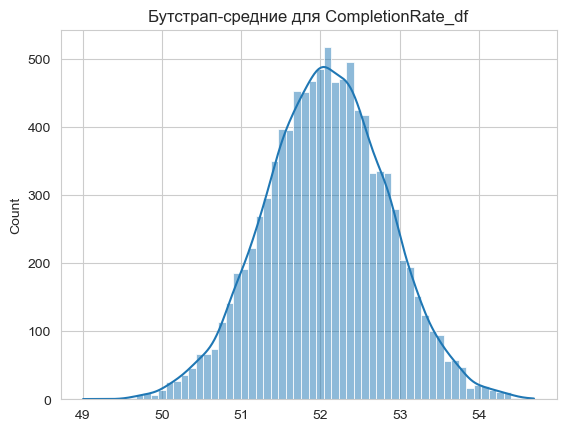

95% доверительный интервал для CompletionRate_df: [50.54 53.57]


In [765]:
# Бутстрап для CompletionRate_df
CompletionRate_df_means = bootstrap_mean(CompletionRate_df)
sns.histplot(CompletionRate_df_means, kde=True)
plt.title("Бутстрап-средние для CompletionRate_df")
plt.show()

# Доверительный интервал для CompletionRate_df
small_ci = np.percentile(CompletionRate_df_means, q=[2.5, 97.5]).round(2)
print(f"95% доверительный интервал для CompletionRate_df: {small_ci}")

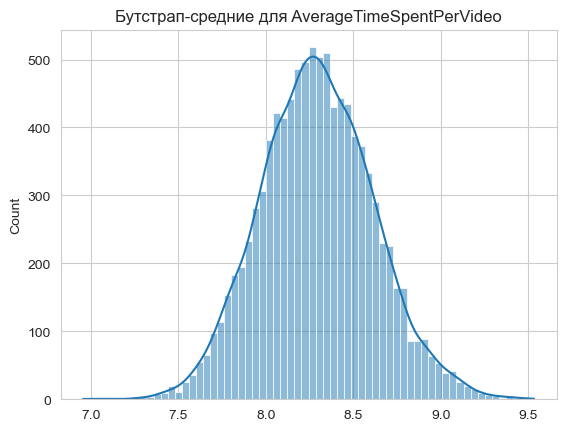

95% доверительный интервал для AverageTimeSpentPerVideo: [7.69 8.95]


In [766]:
# Бутстрап для AverageTimeSpentPerVideo
AverageTimeSpentPerVideo_df = df['AverageTimeSpentPerVideo'].dropna().values
AverageTimeSpentPerVideo_means = bootstrap_mean(AverageTimeSpentPerVideo_df)
sns.histplot(AverageTimeSpentPerVideo_means, kde=True)
plt.title("Бутстрап-средние для AverageTimeSpentPerVideo")
plt.show()

# Доверительный интервал для AverageTimeSpentPerVideo
small_ci = np.percentile(AverageTimeSpentPerVideo_means, q=[2.5, 97.5]).round(2)
print(f"95% доверительный интервал для AverageTimeSpentPerVideo: {small_ci}")

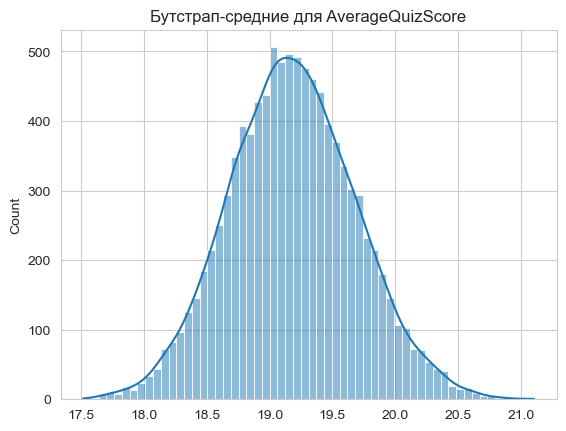

95% доверительный интервал для AverageQuizScore_df: [18.21 20.2 ]


In [767]:
# Бутстрап для AverageQuizScore
AverageQuizScore_df = df['AverageQuizScore'].dropna().values
AverageQuizScore_means = bootstrap_mean(AverageQuizScore_df)
sns.histplot(AverageQuizScore_means, kde=True)
plt.title("Бутстрап-средние для AverageQuizScore")
plt.show()

# Доверительный интервал для AverageQuizScore
small_ci = np.percentile(AverageQuizScore_means, q=[2.5, 97.5]).round(2)
print(f"95% доверительный интервал для AverageQuizScore_df: {small_ci}")

### Сводная таблица

| Метрика                     | Точный доверительный интервал            | Эфронов доверительный интервал (бутстрап) |
|-----------------------------|------------------------------------------|------------------------------------------|
| **CompletionRate**          | [50.5664; 53.5814], ширина: 3.0150       | [50.54; 53.57]                           |
| **AverageTimeSpentPerVideo**| [7.6592; 8.9348], ширина: 1.2755         | [7.69; 8.95]                             |
| **AverageQuizScore**        | [18.1887; 20.1781], ширина: 1.9894       | [18.21; 20.20]                           |


### 5. Подумайте, можно ли использовать в пункте 2 другие стат. тесты. Приведите пару примеров.

Во-первых, можно было проверить данные на нормальность не только с помощью теста Шапиро-Уилка, но и с помощью методов визуального анализа данных - попробовать оценить гистограммы или же QQ-plot.

Во-вторых, говоря о других критериях, рациональным подходом могло бы быть использованания критерия Пирсона.
"Критерий $χ2$ Пирсона – непараметрический метод, который позволяет оценить значимость различий..."